In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
import tensorflow as tf

In [3]:
data = pd.read_csv("ParisHousing.csv")
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [4]:
df = data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [6]:
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [8]:
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [9]:
df[df.duplicated]

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price


In [14]:
for f in df.columns:
    print(f"{f}:\n\tMin:{df[f].min()}\tMax:{df[f].max()}")
    print("_"*50)

squareMeters:
	Min:89	Max:99999
__________________________________________________
numberOfRooms:
	Min:1	Max:100
__________________________________________________
hasYard:
	Min:0	Max:1
__________________________________________________
hasPool:
	Min:0	Max:1
__________________________________________________
floors:
	Min:1	Max:100
__________________________________________________
cityCode:
	Min:3	Max:99953
__________________________________________________
cityPartRange:
	Min:1	Max:10
__________________________________________________
numPrevOwners:
	Min:1	Max:10
__________________________________________________
made:
	Min:1990	Max:2021
__________________________________________________
isNewBuilt:
	Min:0	Max:1
__________________________________________________
hasStormProtector:
	Min:0	Max:1
__________________________________________________
basement:
	Min:0	Max:10000
__________________________________________________
attic:
	Min:1	Max:10000
_________________________________________

<Axes: >

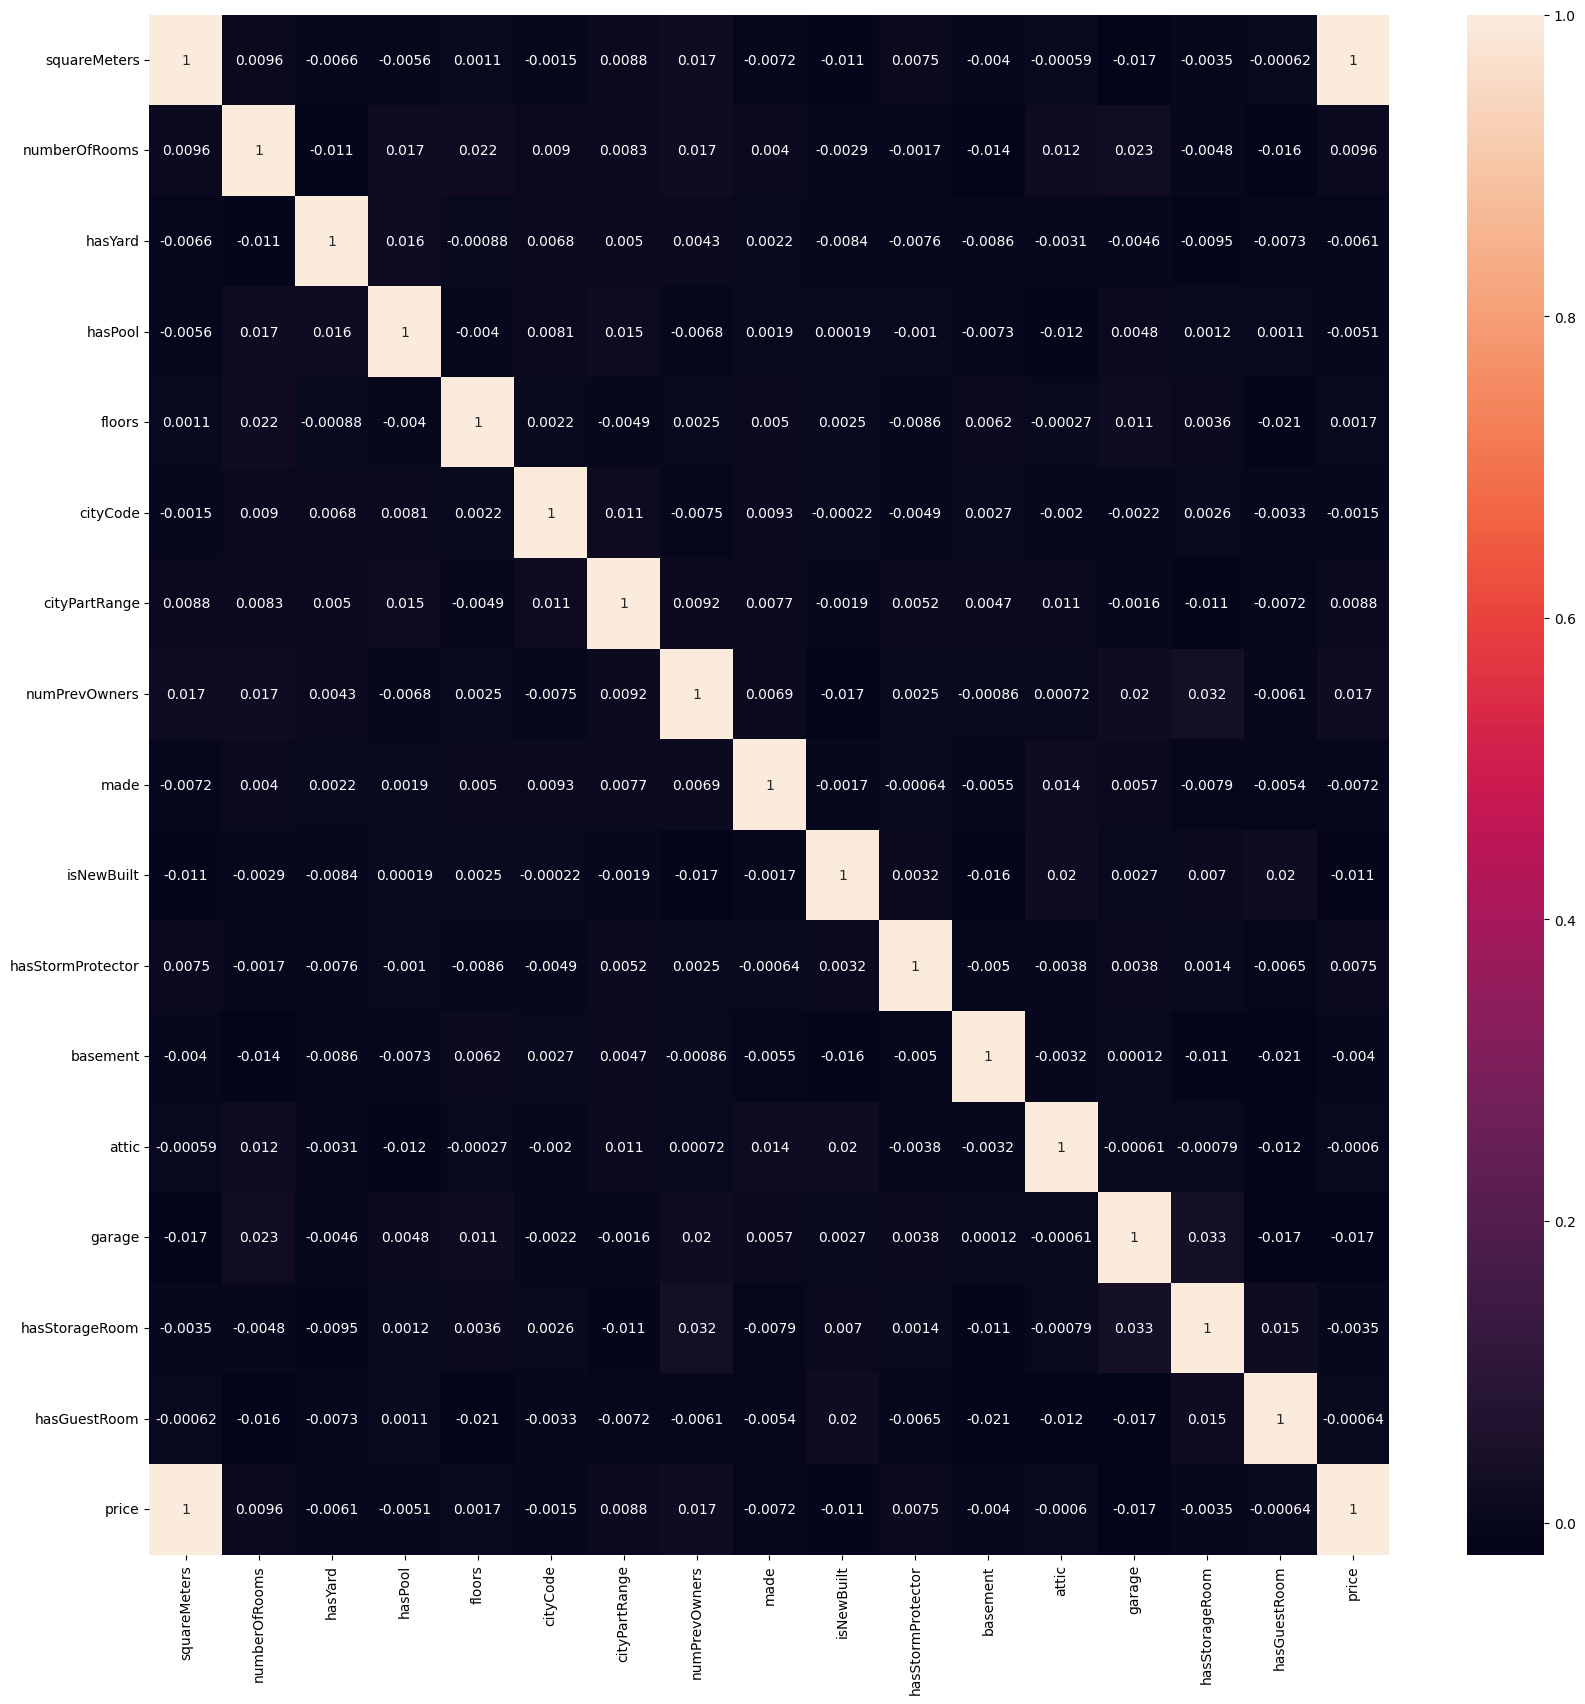

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [18]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [21]:
x["age"] = 2024 - df["made"]
x.drop("made",axis=1,inplace=True)

In [22]:
x

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,age
0,75523,3,0,1,63,9373,3,8,0,1,4313,9005,956,0,7,19
1,80771,39,1,1,98,39381,8,6,1,0,3653,2436,128,1,2,9
2,55712,58,0,1,19,34457,6,8,0,0,2937,8852,135,1,9,3
3,32316,47,0,0,6,27939,10,4,0,1,659,7141,359,0,3,12
4,70429,19,1,1,90,38045,3,7,1,0,8435,2429,292,1,4,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,0,1,9311,1698,218,0,4,15
9996,44403,29,1,1,12,34606,9,4,0,1,9061,1742,230,0,0,34
9997,83841,3,0,0,69,80933,10,10,1,1,8304,7730,345,1,9,19
9998,59036,70,0,0,96,55856,1,3,0,1,2590,6174,339,1,4,14


In [25]:
col = [f for f in x.columns if x[f].nunique()>2]
col

['squareMeters',
 'numberOfRooms',
 'floors',
 'cityCode',
 'cityPartRange',
 'numPrevOwners',
 'basement',
 'attic',
 'garage',
 'hasGuestRoom',
 'age']

In [26]:
mx = MinMaxScaler(feature_range=(0,1))
x[col] = mx.fit_transform(x[col])

In [27]:
x

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,age
0,0.755020,0.020202,0,1,0.626263,0.093747,0.222222,0.777778,0,1,0.4313,0.900490,0.951111,0,0.7,0.516129
1,0.807547,0.383838,1,1,0.979798,0.393977,0.777778,0.555556,1,0,0.3653,0.243524,0.031111,1,0.2,0.193548
2,0.556731,0.575758,0,1,0.181818,0.344712,0.555556,0.777778,0,0,0.2937,0.885189,0.038889,1,0.9,0.000000
3,0.322560,0.464646,0,0,0.050505,0.279500,1.000000,0.333333,0,1,0.0659,0.714071,0.287778,0,0.3,0.290323
4,0.704034,0.181818,1,1,0.898990,0.380610,0.222222,0.666667,1,0,0.8435,0.242824,0.213333,1,0.4,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.016385,0.888889,0,1,0.040404,0.731666,0.666667,0.555556,0,1,0.9311,0.169717,0.131111,0,0.4,0.387097
9996,0.443539,0.282828,1,1,0.111111,0.346203,0.888889,0.333333,0,1,0.9061,0.174117,0.144444,0,0.0,1.000000
9997,0.838274,0.020202,0,0,0.686869,0.809705,1.000000,1.000000,1,1,0.8304,0.772977,0.272222,1,0.9,0.516129
9998,0.590001,0.696970,0,0,0.959596,0.558809,0.000000,0.222222,0,1,0.2590,0.617362,0.265556,1,0.4,0.354839


In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [31]:
x.shape[1]

16

In [29]:
model = tf.keras.models.Sequential()

In [34]:
model.add(tf.keras.layers.Dense(units=20,activation='relu'))
model.add(tf.keras.layers.Dense(units=16,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation=None))

In [35]:
model.compile(optimizer='adam',loss='mean_absolute_error',metrics=["mean_squared_error"])
model.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 4984786.5000 - mean_squared_error: 33179536719872.0000
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 4869845.0000 - mean_squared_error: 32010871504896.0000
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 3878483.0000 - mean_squared_error: 21991903985664.0000
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 2567293.7500 - mean_squared_error: 9355463229440.0000
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 2399822.7500 - mean_squared_error: 7880959852544.0000
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 2374066.7500 - mean_squared_error: 7713902297088.0000
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 2348270.7500 - mean_squared_error: 7552484507648.0000
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 2322129.2500 - mean

In [36]:
pred = model.predict(x_test) 

63/63 [==============================] - 0s 2ms/step


In [44]:
np.array(y_test).reshape(-1,1)

array([[2811125.7],
       [4302362.3],
       [8893969.2],
       ...,
       [1185882.1],
       [7700543.6],
       [8567586.5]])

In [40]:
np.array(pred)

array([[2814757.2],
       [4302225. ],
       [8899055. ],
       ...,
       [1180941.5],
       [7702888. ],
       [8571381. ]], dtype=float32)

In [46]:
np.concatenate((np.array(y_test).reshape(-1,1),np.array(pred)),axis=1)

array([[2811125.7 , 2814757.25],
       [4302362.3 , 4302225.  ],
       [8893969.2 , 8899055.  ],
       ...,
       [1185882.1 , 1180941.5 ],
       [7700543.6 , 7702888.  ],
       [8567586.5 , 8571381.  ]])

In [48]:
from sklearn.metrics import mean_squared_error,r2_score

In [50]:
print(f"Mean Squared Error: {mean_squared_error(y_test,pred)}")

Mean Squared Error: 27540533.9902508


In [51]:
print(f"R2 Score: {r2_score(y_test,pred)}")

R2 Score: 0.9999965856863605
